In [58]:
import os

In [59]:
os.chdir("F:\IDEA\Second Year\Quantitative Macroeconomics\PS2")

In [60]:
from scipy.optimize import fsolve
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Exercise a) Compute a steady state

In [61]:
# First, we define the parameters that the problem give us.
#labor share
theta=0.67
#labor suply
h=0.31 
# Parameter of producivity
z=1.629 

# Now I define the system of equations that must hold in the Steady State and solve for root:

def SteadyState(vars):
  
    k_ss,c_ss,y_ss,beta,delta=vars
    Euler=beta*((1-theta)*(k_ss**(-theta))*((z*h)**theta)+(1-delta))-1
    ResourceC =y_ss-delta*k_ss-c_ss
    Production=y_ss-(k_ss**(1-theta))*((z*h)**theta)
    CYratio=(k_ss/y_ss)-4
    IYratio_2=((delta*k_ss)/y_ss)-0.25
    return [Euler, ResourceC, Production, CYratio, IYratio_2]

x0=[4,0.75,1,0.98,0.06]
#Solving for the Steady State
k_ss,c_ss,y_ss,beta,delta=fsolve(SteadyState,x0) 
#Investment in steady state
i_ss=delta*k_ss
SteadyState={"k_ss":k_ss,"c_ss":c_ss,"y_ss":y_ss,"β":beta,"δ":delta,"i_ss":i_ss}
print(SteadyState)

{'k_ss': 3.9983405378022554, 'c_ss': 0.749688850837957, 'y_ss': 0.9995851344505639, 'β': 0.9803921568576601, 'δ': 0.06250000000000001, 'i_ss': 0.24989628361264102}


## Exercise b) introduce a shock

In [62]:
# Productivity shock
z_new=2*z
# Now I define the system of equations that must hold in the Steady State and solve for root:
def SteadyState_2(vars):
   
    k_ss2,c_ss2,y_ss2,beta_2,delta_2=vars
    Euler_2=beta_2*((1-theta)*(k_ss2**(-theta))*((z_new*h)**theta)+(1-delta_2))-1
    ResourceC_2=y_ss2-delta_2*k_ss2-c_ss2
    Production_2=y_ss2-(k_ss2**(1-theta))*((z_new*h)**theta)
    CYratio_2=(k_ss2/y_ss2)-4
    IYratio_2=((delta_2*k_ss2)/y_ss2)-0.25
    return [Euler_2, ResourceC_2, Production_2, CYratio_2, IYratio_2]

x02=[4,0.75,1,0.98,0.06]
#Solving for the Steady State 2
k_ss2,c_ss2,y_ss2,beta_2,delta_2=fsolve(SteadyState_2,x02) 
#Investment in steady state 2
i_ss2=delta_2*k_ss2
SteadyState_2={"k_ss2":k_ss2,"c_ss2":c_ss2,"y_ss2":y_ss2,"β2":beta_2,"δ2":delta_2,"i_ss2":i_ss2}
print(SteadyState_2)

{'k_ss2': 7.996681074161963, 'c_ss2': 1.499377701669063, 'y_ss2': 1.9991702688108393, 'β2': 0.9803921568935487, 'δ2': 0.06250000000067645, 'i_ss2': 0.49979256714053205}


## Exercise c) Compute the transition from the first to the second steady state and report the time-path for savings, consumption, labor and output.

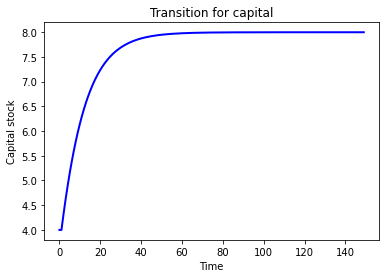

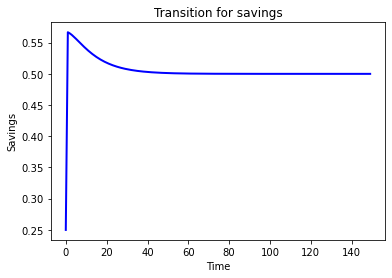

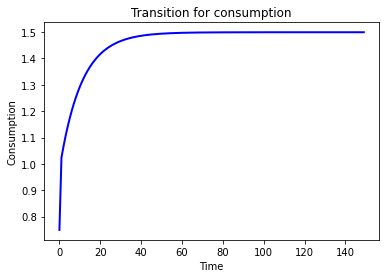

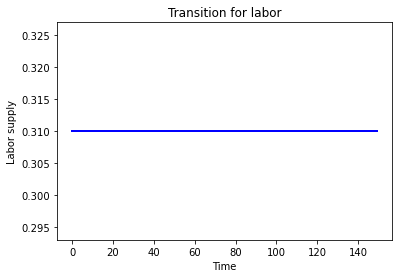

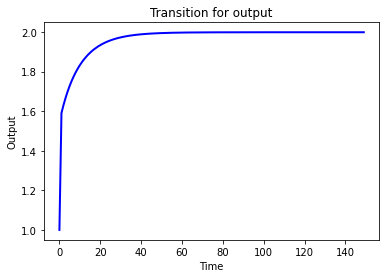

In [63]:
def u_p(c):
    return 1/c
#And the second one is the production function:
def y(k,z):
    return k**(1-theta)*(z*h)**theta

#The solution for the following problem of non linear equations is a sequence of capitals such that Euler eq.
#holds every period. With a sufficiently large number of simulations we should see how economy approaches to steady state.

n=149   #number of periods I siumlate


def transition(k, n=n):
    k_0=k_ss
    k_end=k_ss2
    k[0]=k_ss #Initial condition
    k[n-1]=k_ss2 #Final condition
    k_vector=np.zeros(n)
    for i in range(0,n-2):
        if i==0:
            k_vector[i+1]=u_p(y(k_0,z_new)+(1-delta)*k_0-k[i+1])-beta*u_p(y(k[i+1],z_new)+(1-delta)*k[i+1]-k[i+2])*(1-delta+(1-theta)*(1/(k[i+1])**(theta))*((y(k_0,z_new))/(k_0**(1-theta))))                                
        elif i==(n-2):
            k_vector[i+1]=u_p(y(k[i],z_new)+(1-delta)*k[i]-k[i+1])-beta*u_p(y(k[i+1],z_new)+(1-delta)*k[i+1]-k_end)*(1-delta+(1-theta)*(1/(k[i+1])**(theta))*((y(k[i],z_new))/(k[i]**(1-theta))))                                                       
        else:
            k_vector[i+1]=u_p(y(k[i],z_new)+(1-delta)*k[i]-k[i+1])-beta*u_p(y(k[i+1],z_new)+(1-delta)*k[i+1]-k[i+2])*(1-delta+(1-theta)*(1/(k[i+1])**(theta))*((y(k[i],z_new))/(k[i]**(1-theta))))     

    return(k_vector)
x0=np.linspace(4,8,n) #Initial values. I choosed them in a manner such that they are not too far of what I guess that will be the solution.
trans_k=fsolve(transition,x0)  #This is the transition path for capital
# Since I have the transition for the capital, we solve for the rest of equations

#Transition path output
trans_y=y(trans_k,z_new) #Transition path output

#Transition path for savings:
trans_s=np.zeros(n)

for i in range(0,n-1):
        trans_s[i]=trans_k[i+1]-(1-delta)*trans_k[i]

trans_s[n-1]=trans_s[n-2]
#Transition path for consumption.
trans_pathcons=trans_y-trans_s

##Transition path for labour, since labour is unchanged
trans_pathlabor=np.ones(n)*h
                        

#Now let me add the steady state observations at the begining of each transition path.

trans_k=np.insert(trans_k,0,k_ss)
trans_y=np.insert(trans_y,0,y_ss)
trans_s=np.insert(trans_s,0,i_ss)  #iss because investment equals savings in this models.
trans_pathcons=np.insert(trans_pathcons,0,c_ss)
trans_pathlabor=np.insert(trans_pathlabor,0,h)

#Create time vector
time=np.array(list(range(0,(n+1))))


#And finally plot the figures:
fig,ax = plt.subplots()    
ax.plot(time, trans_k,'-', color='blue', linewidth=2)   
ax.set_title('Transition for capital')
ax.set_ylabel('Capital stock')
ax.set_xlabel('Time')
plt.show()


fig,ax = plt.subplots()    
ax.plot(time, trans_s,'-', color='blue', linewidth=2)   
ax.set_title('Transition for savings')
ax.set_ylabel('Savings')
ax.set_xlabel('Time')
plt.show()


fig,ax = plt.subplots()    
ax.plot(time, trans_pathcons,'-', color='blue', linewidth=2)     
ax.set_title('Transition for consumption')
ax.set_ylabel('Consumption')
ax.set_xlabel('Time')
plt.show()


fig,ax = plt.subplots()    
ax.plot(time, trans_pathlabor, 'blue', linewidth=2)   
ax.set_title('Transition for labor')
ax.set_ylabel('Labor supply')
ax.set_xlabel('Time')
plt.show()


fig,ax = plt.subplots()    
ax.plot(time, trans_y,'-', color='blue', linewidth=2)   
ax.set_title('Transition for output')
ax.set_ylabel('Output')
ax.set_xlabel('Time')
plt.show()

### Exercise d) Unexpected shock

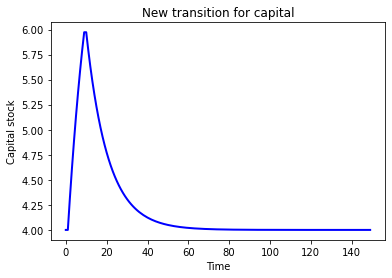

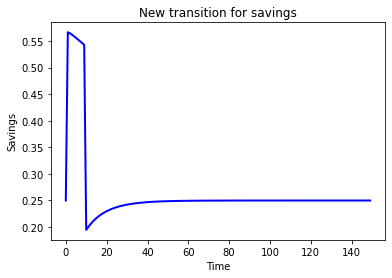

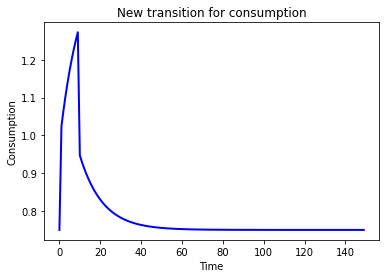

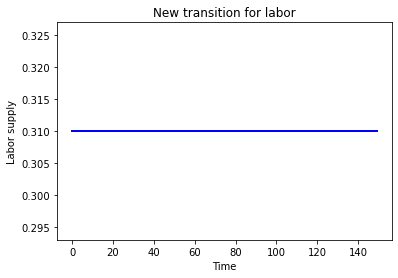

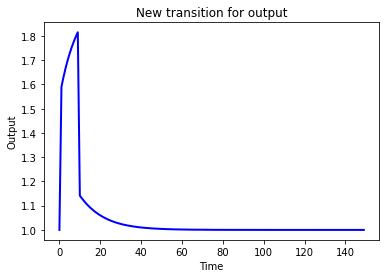

In [64]:
n2=140


def secondtransition(k, n2=n2):
    k_0=trans_k[9]
    k_end=k_ss
    k[0]=trans_k[9]
    k[n2-1]=k_ss
    k_vector2=np.zeros(n2)
    for i in range(0,n2-2):
        if i==0:
            k_vector2[i+1]=u_p(y(k_0,z)+(1-delta)*k_0-k[i+1])-beta*u_p(y(k[i+1],z)+(1-delta)*k[i+1]-k[i+2])*(1-delta+(1-theta)*(1/(k[i+1])**(theta))*((y(k_0,z))/(k_0**(1-theta))))                  
        elif i==(n2-2):
            k_vector2[i+1]=u_p(y(k[i],z)+(1-delta)*k[i]-k[i+1])-beta*u_p(y(k[i+1],z)+(1-delta)*k[i+1]-k_end)*(1-delta+(1-theta)*(1/(k[i+1])**(theta))*((y(k[i],z))/(k[i]**(1-theta))))                                              
        else:
            k_vector2[i+1]=u_p(y(k[i],z)+(1-delta)*k[i]-k[i+1])-beta*u_p(y(k[i+1],z)+(1-delta)*k[i+1]-k[i+2])*(1-delta+(1-theta)*(1/(k[i+1])**(theta))*((y(k[i],z))/(k[i]**(1-theta))))                
    return(k_vector2)
x02=np.linspace(6,4,n2)
trans_k2=fsolve(secondtransition,x02)

# Since I have the transition for the capital, we solve for the rest of equations

#Transition path output
trans_y2=y(trans_k2,z) 

trans_s2=np.zeros(n2)

for i in range(0,n2-1):
        trans_s2[i]=trans_k2[i+1]-(1-delta)*trans_k2[i]
        
#Transition path for savings
trans_s2[n2-1]=trans_s2[n2-2]

#Transition path for consumption
trans_pathcons2=trans_y2-trans_s2 

#Transitions path for labour is straight to.

trans_pathlabor2=np.ones(n2)*h 


#Finally, add periods 0 to 9 of part c) vectors to get the complete transition dynamics:
trans_k2=np.concatenate((trans_k[0:10],trans_k2))   
trans_y2=np.concatenate((trans_y[0:10],trans_y2)) 
trans_s2=np.concatenate((trans_s[0:10],trans_s2)) 
trans_pathcons2=np.concatenate((trans_pathcons[0:10],trans_pathcons2)) 
trans_pathlabor2=np.concatenate((trans_pathlabor[0:10],trans_pathlabor2))



#And plot results:

fig,ax = plt.subplots()    
ax.plot(time, trans_k2,'-', color='blue', linewidth=2)   
ax.set_title('New transition for capital')
ax.set_ylabel('Capital stock')
ax.set_xlabel('Time')
plt.show()


fig,ax = plt.subplots()    
ax.plot(time, trans_s2,'-', color='blue', linewidth=2)   
ax.set_title('New transition for savings')
ax.set_ylabel('Savings')
ax.set_xlabel('Time')
plt.show()


fig,ax = plt.subplots()    
ax.plot(time, trans_pathcons2,'-', color='blue', linewidth=2)     
ax.set_title('New transition for consumption')
ax.set_ylabel('Consumption')
ax.set_xlabel('Time')
plt.show()


fig,ax = plt.subplots()    
ax.plot(time, trans_pathlabor2, 'b-', linewidth=2)   
ax.set_title('New transition for labor')
ax.set_ylabel('Labor supply')
ax.set_xlabel('Time')
plt.show()


fig,ax = plt.subplots()    
ax.plot(time, trans_y2,'-', color='blue', linewidth=2)   
ax.set_title('New transition for output')
ax.set_ylabel('Output')
ax.set_xlabel('Time')
plt.show()

### Exercise e) Introducing a labour in the utility function

In [65]:
# First I define the parameters that we know
#labor share
# I give a value for mu,v and z otherwise the function is not working.
theta=0.67  
v = 0.31 
mu=0.4
# Parameter of producivity

# Now I define the equations that must hold in the Steady State and solve for roots

def SteadyStateh(vars):
    k_ss,c_ss,y_ss,beta,delta,h_t,z=vars
    Euler=beta*((1-theta)*(k_ss**(-theta))*((z*h)**theta)+(1-delta))-1
    ResourceC=y_ss-delta*k_ss-c_ss
    Production=y_ss-(k_ss**(1-theta))*((z*h_t)**theta)
    CYratio=(k_ss/y_ss)-4
    IYratio=((delta*k_ss)/y_ss)-0.25
    labourmarket_ss = h_t-((z**(theta) * theta *k_ss**(1-theta))/c_ss*mu)**(1/((1/v)+(1-theta)))
    zeta = z_new - (y_ss/k_ss**(1-theta)*k_ss**theta)**1/theta                                                                 
    return [Euler, ResourceC, Production, CYratio, IYratio, labourmarket_ss, zeta]

x0=[4,0.75,1,0.98,0.0625,0.7,0.8]
#Solving for the Steady State
k_ss,c_ss,y_ss,beta,delta,h_t,z= fsolve(SteadyStateh,x0) 
#Investment in steady state
i_ss=delta*k_ss
SteadyStateh={"k_ss":k_ss,"c_ss":c_ss,"y_ss":y_ss,"β":beta,"δ":delta,"i_ss":i_ss,"h_ss":h_t,"z":z}
print(SteadyStateh)



{'k_ss': 5.038518889114851, 'c_ss': 0.9447222917114948, 'y_ss': 1.259629722281173, 'β': 1.0185244072559836, 'δ': 0.0625, 'i_ss': 0.3149074305696782, 'h_ss': 0.7838604895839534, 'z': 0.8118337734709002}


In [66]:
z_new=2*z
mu=0.4
v = 0.31 
# I set the equations such that they have to be equal to zero, we are solving for roots
def SteadyState2(vars):
    k_ss2,c_ss2,y_ss2,beta_2,delta_2,h_t2=vars
    Euler_2=beta_2*((1-theta)*(k_ss2**(-theta))*((z_new*h_t2)**theta)+(1-delta_2))-1
    ResourceC_2=y_ss2-delta*k_ss2-c_ss2
    Production_2=y_ss2-(k_ss2**(1-theta))*((z_new*h_t2)**theta)
    CYratio_2=(k_ss2/y_ss2)-4
    IYratio_2=((delta_2*k_ss2)/y_ss2)-0.25
    labourmarket_ss2 = h_t2-((z_new**(theta) * theta *k_ss2**(1-theta))/c_ss2*mu)**(1/((1/v)+(1-theta)))
   
    return [Euler_2, ResourceC_2, Production_2, CYratio_2, IYratio_2, labourmarket_ss2 ]

x02=[4,0.75,1,0.98,0.0625,0.5]
#Solving for the Steady State
k_ss2,c_ss2,y_ss2,beta_2,delta_2,h_t2= fsolve(SteadyState2,x02) 
#Investment in steady state
i_ss2=delta_2*k_ss2
SteadyState2={"k_ss2":k_ss2,"c_ss2":c_ss2,"y_ss2":y_ss2,"β2":beta_2,"δ2":delta_2,"i_ss2":i_ss2,"h_ss2":h_t2}
print(SteadyState2)
    

{'k_ss2': 10.077037774804271, 'c_ss2': 1.8894445838186622, 'y_ss2': 2.519259444743929, 'β2': 0.9803921566768283, 'δ2': 0.0625, 'i_ss2': 0.629814860925267, 'h_ss2': 0.7838604896240388}


### Exercise 2: Show the result of problem of Covid

Text(33.0, 0.5, '$β(HC)$')

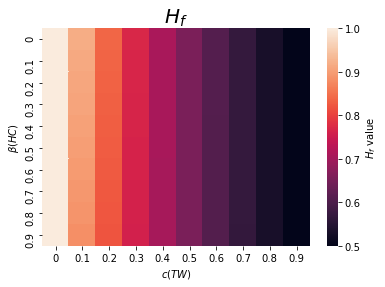

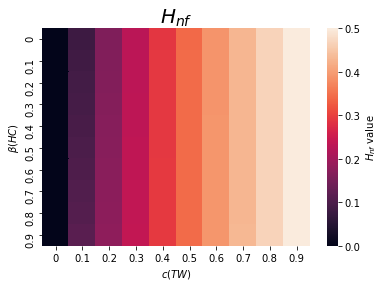

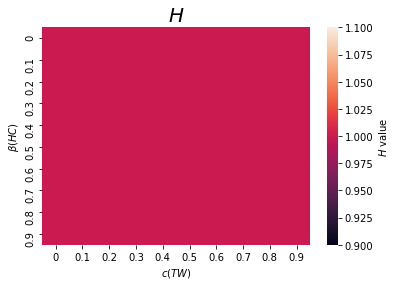

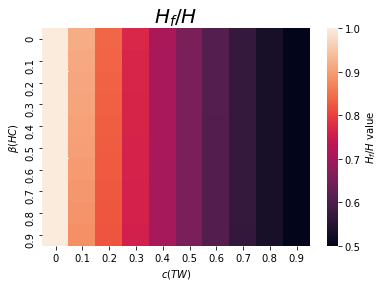

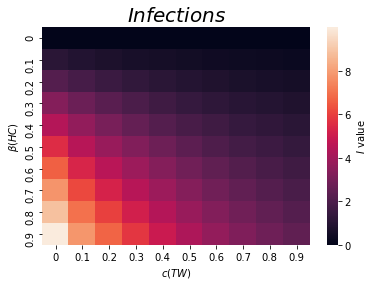

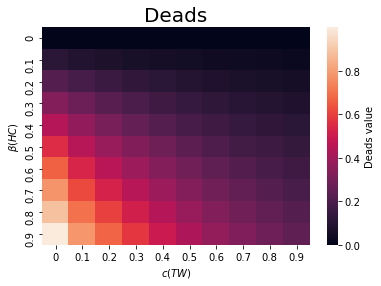

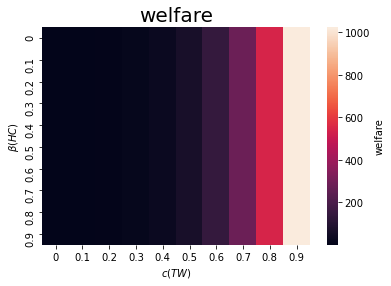

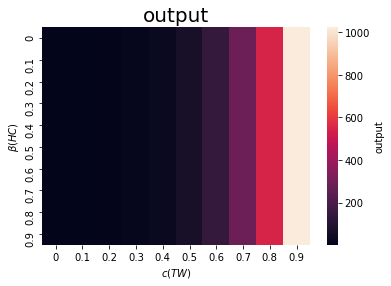

In [67]:
A_f = 1
A_nf = 1
rho = 1.1
k_f = 0.2
k_nf = 0.2
w = 20
gamma = 0.9
i_0 = 0.2
N = 1
H = 1
n=10


#Define the objective function

cov = lambda s: -1*((A_f*s[0]**((rho-1)/rho) + x[j]*A_nf*s[1]**((rho-1)/rho))**(rho/(rho-1)) - k_f*s[0] -k_nf *s[1] -w*((1-gamma)*x[i]*(i_0*s[0]**2/N)))

#Define the constraint

cons = ({'type':'ineq','fun': lambda s: N - s[0] - s[1] }) 

x = np.linspace(0,1,n)           
# Array of results for H_f
H_f = np.zeros(shape=(n,n))    
# Array of results for H_nf
H_nf = np.zeros(shape=(n,n))  
           
for i in range(n):  
    for j in range(n):        
        bnds = [(0,1),(0,1)] 
        opt = minimize(cov, [0.5,0.5], constraints = cons, bounds=bnds)
        H_f[i][j] = opt.x[0]                     
        H_nf[i][j] = opt.x[1]  
        
result = np.zeros(shape=(n,n))

for i in range (n):
    for j in range(n):
        result[i][j]=(A_f*H_f[i][j]**((rho-1)/rho) + x[j]*A_nf*H_nf[i][j]**((rho-1)/rho))**(rho/(rho-1))

H = H_f +H_nf

H_f_H = H_f/H

# Infections

I = np.zeros(shape = (n,n))
for i in range(n):
    for j in range(n):
        I[i][j] = H_f[i][j]**2*10*x[i]
## Deaths:
D  = (1-gamma)*I

# Welfare:
welfare = np.zeros(shape=(n,n))
for i in range (n):
    for j in range(n):
        welfare[i][j]= (A_f*H_f[i][j]**((rho-1)/rho) + x[j]*A_nf*H_nf[i][j]**((rho-1)/rho))**(rho/(rho-1)) - k_f*H_f[i][j] -k_nf *H_nf[i][j] -w*((1-gamma)*x[i]*(i_0*H_f[i][j]**2/N))

#plot the resault with heatmap



values = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  

fig, ax = plt.subplots()
sns.heatmap(H_f,cbar_kws={"label":"$H_f$ value"},xticklabels =values,yticklabels=values)
plt.title("$H_f$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(H_nf,cbar_kws={"label":"$H_{nf}$ value"},xticklabels =values,yticklabels=values)
plt.title("$H_{nf}$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

H_2 = np.ones(shape=(n,n))  # I'm having a problem ploting H, that's why I create this variable
fig, ax = plt.subplots()
sns.heatmap(H_2,cbar_kws={"label":"$H$ value"},xticklabels =values,yticklabels=values)
plt.title("$H$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(H_f_H,cbar_kws={"label":"$H_f/H$ value"},xticklabels =values,yticklabels=values)
plt.title("$H_f/H$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(I,cbar_kws={"label":"$I$ value"},xticklabels =values,yticklabels=values)
plt.title("$Infections$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(D,cbar_kws={"label":"Deads value"},xticklabels =values,yticklabels=values)
plt.title("Deads",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(welfare,cbar_kws={"label":"welfare"},xticklabels =values,yticklabels=values)
plt.title("welfare",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

         
fig, ax = plt.subplots()
sns.heatmap(result,cbar_kws={"label":"output"},xticklabels =values,yticklabels=values)
plt.title("output",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")
    

### Exercise b) Change rho = 8.5

Text(33.0, 0.5, '$β(HC)$')

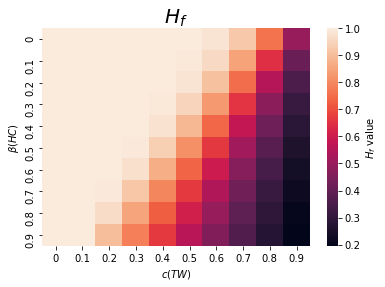

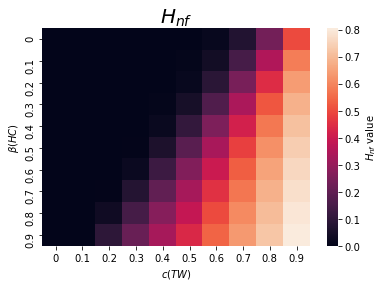

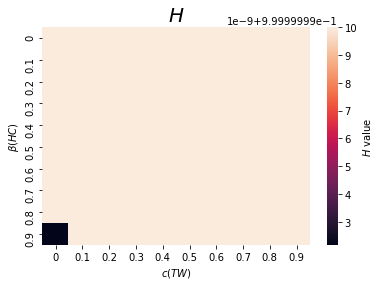

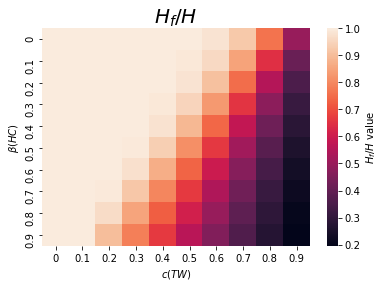

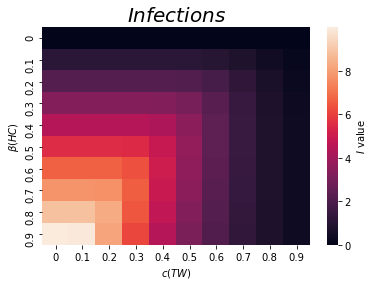

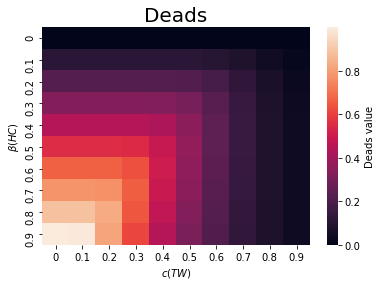

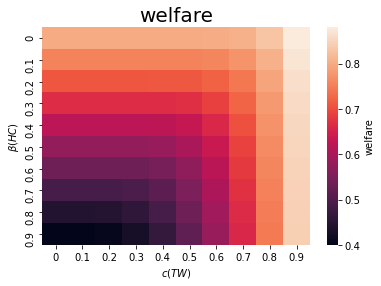

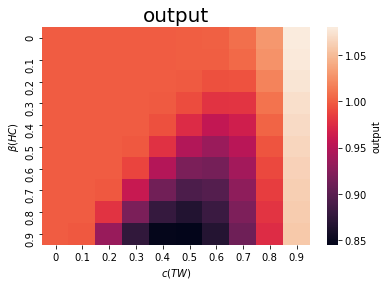

In [68]:
A_f = 1
A_nf = 1
rho = 10
k_f = 0.2
k_nf = 0.2
w = 20
gamma = 0.9
i_0 = 0.2
N = 1
H = 1
n=10

#Define the objective function

cov = lambda s:-1*((A_f*s[0]**((rho-1)/rho) + x[j]*A_nf*s[1]**((rho-1)/rho))**(rho/(rho-1)) - k_f*s[0] -k_nf *s[1] -w*((1-gamma)*x[i]*(i_0*s[0]**2/N)))

#Define the constraint

cons = ({'type':'ineq','fun': lambda s: N - s[0] - s[1] }) 

x = np.linspace(0,1,n)           
# Array of results for H_f
H_f = np.zeros(shape=(n,n))    
# Array of results for H_nf
H_nf = np.zeros(shape=(n,n))  
           
for i in range(n):  
    for j in range(n):        
        bnds = [(0,1),(0,1)] 
        opt = minimize(cov, [0.5,0.5], constraints = cons, bounds=bnds)
        H_f[i][j] = opt.x[0]                     
        H_nf[i][j] = opt.x[1]  
        
result = np.zeros(shape=(n,n))

for i in range (n):
    for j in range(n):
        result[i][j]=(A_f*H_f[i][j]**((rho-1)/rho) + x[j]*A_nf*H_nf[i][j]**((rho-1)/rho))**(rho/(rho-1))

H = H_f +H_nf

H_f_H = H_f/H

# Infections

I = np.zeros(shape = (n,n))
for i in range(n):
    for j in range(n):
        I[i][j] = H_f[i][j]**2*10*x[i]
## Deaths:
D  = (1-gamma)*I

# Welfare:
welfare = np.zeros(shape=(n,n))
for i in range (n):
    for j in range(n):
        welfare[i][j]= (A_f*H_f[i][j]**((rho-1)/rho) + x[j]*A_nf*H_nf[i][j]**((rho-1)/rho))**(rho/(rho-1)) - k_f*H_f[i][j] -k_nf *H_nf[i][j] -w*((1-gamma)*x[i]*(i_0*H_f[i][j]**2/N))

#plot the resault with heatmap



values = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  

fig, ax = plt.subplots()
sns.heatmap(H_f,cbar_kws={"label":"$H_f$ value"},xticklabels =values,yticklabels=values)
plt.title("$H_f$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(H_nf,cbar_kws={"label":"$H_{nf}$ value"},xticklabels =values,yticklabels=values)
plt.title("$H_{nf}$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

#H_2 = np.ones(shape=(n,n))  # I'm having a problem ploting H, that's why I create this variable
fig, ax = plt.subplots()
sns.heatmap(H,cbar_kws={"label":"$H$ value"},xticklabels =values,yticklabels=values)
plt.title("$H$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(H_f_H,cbar_kws={"label":"$H_f/H$ value"},xticklabels =values,yticklabels=values)
plt.title("$H_f/H$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(I,cbar_kws={"label":"$I$ value"},xticklabels =values,yticklabels=values)
plt.title("$Infections$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(D,cbar_kws={"label":"Deads value"},xticklabels =values,yticklabels=values)
plt.title("Deads",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(welfare,cbar_kws={"label":"welfare"},xticklabels =values,yticklabels=values)
plt.title("welfare",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

         
fig, ax = plt.subplots()
sns.heatmap(result,cbar_kws={"label":"output"},xticklabels =values,yticklabels=values)
plt.title("output",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

### Exercise b) Change omega = 80

Text(33.0, 0.5, '$β(HC)$')

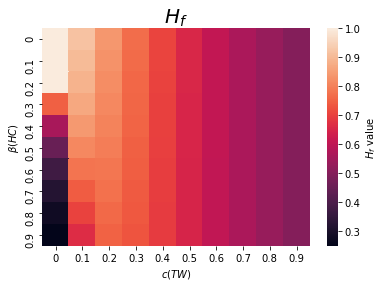

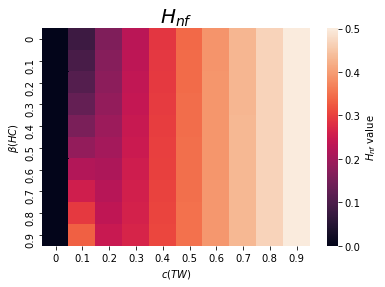

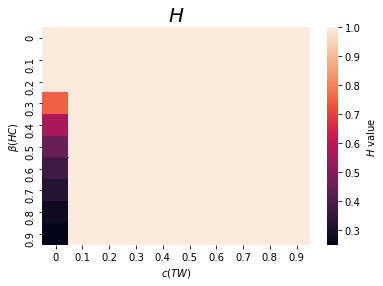

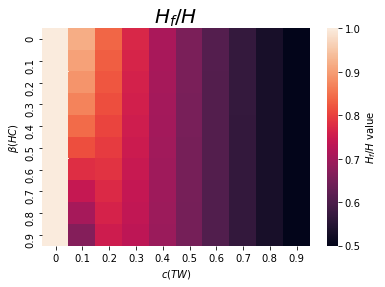

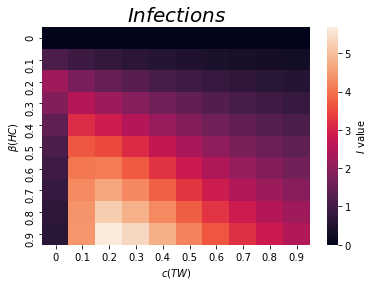

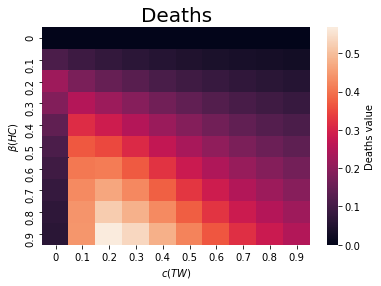

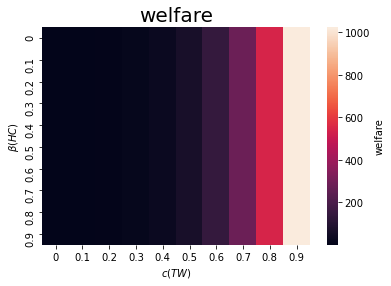

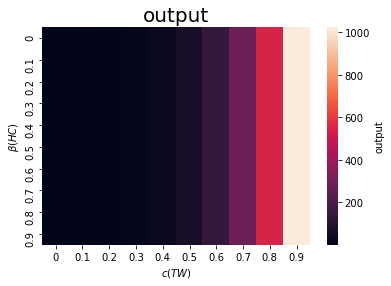

In [69]:
A_f = 1
A_nf = 1
rho = 1.1
k_f = 0.2
k_nf = 0.2
w = 80
gamma = 0.9
i_0 = 0.2
N = 1
H = 1
n=10

#Define the objective function

cov = lambda s:  -1*((A_f*s[0]**((rho-1)/rho) + x[j]*A_nf*s[1]**((rho-1)/rho))**(rho/(rho-1)) - k_f*s[0] -k_nf *s[1] -w*((1-gamma)*x[i]*(i_0*s[0]**2/N)))

#Define the constraint

cons = ({'type':'ineq','fun': lambda s: N - s[0] - s[1] }) 

x = np.linspace(0,1,n)           
# Array of results for H_f
H_f = np.zeros(shape=(n,n))    
# Array of results for H_nf
H_nf = np.zeros(shape=(n,n))  
           
for i in range(n):  
    for j in range(n):        
        bnds = [(0,1),(0,1)] 
        opt = minimize(cov, [0.5,0.5], constraints = cons, bounds=bnds)
        H_f[i][j] = opt.x[0]                     
        H_nf[i][j] = opt.x[1]  
        
result = np.zeros(shape=(n,n))

for i in range (n):
    for j in range(n):
        result[i][j]=(A_f*H_f[i][j]**((rho-1)/rho) + x[j]*A_nf*H_nf[i][j]**((rho-1)/rho))**(rho/(rho-1))


H = H_f +H_nf

H_f_H = H_f/H

# Infections

I = np.zeros(shape = (n,n))
for i in range(n):
    for j in range(n):
        I[i][j] = H_f[i][j]**2*10*x[i]
## Deaths:
D  = (1-gamma)*I

# Welfare:
welfare = np.zeros(shape=(n,n))
for i in range (n):
    for j in range(n):
        welfare[i][j]= (A_f*H_f[i][j]**((rho-1)/rho) + x[j]*A_nf*H_nf[i][j]**((rho-1)/rho))**(rho/(rho-1)) - k_f*H_f[i][j] -k_nf *H_nf[i][j] -w*((1-gamma)*x[i]*(i_0*H_f[i][j]**2/N))

#plot the resault with heatmap



values = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  

fig, ax = plt.subplots()
sns.heatmap(H_f,cbar_kws={"label":"$H_f$ value"},xticklabels =values,yticklabels=values)
plt.title("$H_f$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(H_nf,cbar_kws={"label":"$H_{nf}$ value"},xticklabels =values,yticklabels=values)
plt.title("$H_{nf}$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")


fig, ax = plt.subplots()
sns.heatmap(H,cbar_kws={"label":"$H$ value"},xticklabels =values,yticklabels=values)
plt.title("$H$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

#H_2 = np.ones(shape=(n,n))  # I'm having a problem ploting H, that's why I create this variable
fig, ax = plt.subplots()
sns.heatmap(H_f_H,cbar_kws={"label":"$H_f/H$ value"},xticklabels =values,yticklabels=values)
plt.title("$H_f/H$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(I,cbar_kws={"label":"$I$ value"},xticklabels =values,yticklabels=values)
plt.title("$Infections$",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(D,cbar_kws={"label":"Deaths value"},xticklabels =values,yticklabels=values)
plt.title("Deaths",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

fig, ax = plt.subplots()
sns.heatmap(welfare,cbar_kws={"label":"welfare"},xticklabels =values,yticklabels=values)
plt.title("welfare",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")

         
fig, ax = plt.subplots()
sns.heatmap(result,cbar_kws={"label":"output"},xticklabels =values,yticklabels=values)
plt.title("output",fontsize=20)
plt.xlabel("$c(TW)$")
plt.ylabel("$β(HC)$")